<a href="https://colab.research.google.com/github/SoheliPaul/NLP/blob/main/NLP_561_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement the Edit Distance.

In [ ]:
def edit_distance(string1, string2):

    if len(string1) > len(string2):
        difference = len(string1) - len(string2)
        string1[:difference]

    elif len(string2) > len(string1):
        difference = len(string2) - len(string1)
        string2[:difference]

    else:
        difference = 0

    for i in range(len(string1)):
        if string1[i] != string2[i]:
            difference += 1

    return difference

print(edit_distance("kitten", "sitting"))
print(edit_distance("medium", "median"))


3
2


# Implement the Story or Poem Creator based on the keywords using NLG.

Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

Loading the data

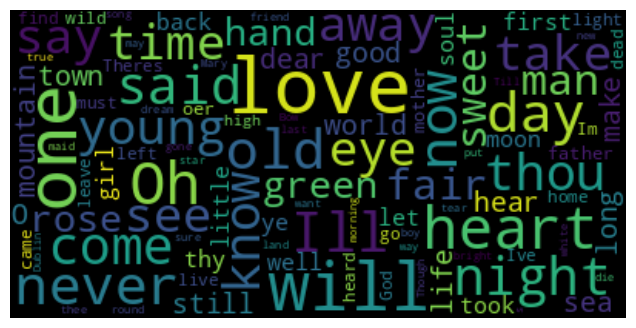

In [ ]:
# Reading the text data file
data = open('poem.txt', encoding="utf8").read()

# EDA: Generating WordCloud to visualize
# the text
wordcloud = WordCloud(max_font_size=50,
					max_words=100,
					background_color="black").generate(data)

# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

Creating the Corpus

Now, I have all my data present in this massive text file. However, it is not recommended to feed our model with all the data altogether as it would lead to a lesser accuracy. Thus, I will be splitting my text into lines so that I can use it to generate text embeddings for my model.

In [ ]:
# Generating the corpus by
# splitting the text into lines
corpus = data.lower().split("\n")
print(corpus[:10])

['stay, i said', 'to the cut flowers.', 'they bowed', 'their heads lower.', 'stay, i said to the spider,', 'who fled.', 'stay, leaf.', 'it reddened,', 'embarrassed for me and itself.', 'stay, i said to my body.']


Fitting the Tokenizer on the Corpus

In order to generate the embeddings later, I need to fit a TensorFlow Tokenizer on the entire corpus so that it learns the vocabulary.  

In [ ]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)

print("Total Words:", total_words)


Total Words: 3807


Generating Embeddings/Vectorization

Now I will generate embeddings for each sentence in my corpus.

*Embeddings are vectorized representations of our text.*

Since I cannot feed Machine/Deep Learning models with unstructured text, this is an imperative step. Firstly, I convert each sentence to embedding using Keras’ text_to_sequence() function. Then I compute the length of the longest embedding; finally, I pad all the embeddings to that maximum length with zeros so as to ensure embeddings of equal length.

In [ ]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [ ]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

 Building the Bi-directional LSTM Model

By now, I am done with all the pre-processing steps that were required in order to feed the text to my model. Its time now that I start building the model. Since this is a use case of text generation, I will create a Bi-directional LSTM model as meaning plays an important role here.

In [ ]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100,
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           380800    
                                                                 
 bidirectional (Bidirection  (None, 15, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3807)              384507    
                                                                 
 dense_1 (Dense)             (None, 3808)              14500864  
                                                        

Model Training

In [12]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
510/510 [==============================] - 24s 31ms/step - loss: 6.9394 - accuracy: 0.0617
Epoch 2/150
510/510 [==============================] - 6s 12ms/step - loss: 6.5270 - accuracy: 0.0635
Epoch 3/150
510/510 [==============================] - 6s 12ms/step - loss: 6.3372 - accuracy: 0.0657
Epoch 4/150
510/510 [==============================] - 6s 12ms/step - loss: 6.2121 - accuracy: 0.0749
Epoch 5/150
510/510 [==============================] - 7s 13ms/step - loss: 6.1100 - accuracy: 0.0806
Epoch 6/150
510/510 [==============================] - 6s 11ms/step - loss: 5.9972 - accuracy: 0.0878
Epoch 7/150
510/510 [==============================] - 7s 13ms/step - loss: 5.8728 - accuracy: 0.0989
Epoch 8/150
510/510 [==============================] - 6s 12ms/step - loss: 5.7616 - accuracy: 0.1053
Epoch 9/150
510/510 [==============================] - 6s 12ms/step - loss: 5.6657 - accuracy: 0.1101
Epoch 10/150
510/510 [==============================] - 6s 12ms/step - loss: 5.57

Generating Text using the Built Model

In the final step, I will generate poetry using my model. As stated earlier, the model is based upon a next-word prediction approach – hence, I need to provide the model with some seed text.

In [17]:
seed_text = "I love"
next_words = 25
ouptut_text = ""

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences(
		[token_list], maxlen=max_sequence_len-1,
	padding='pre')
	predicted = np.argmax(model.predict(token_list,
										verbose=0), axis=-1)
	output_word = ""

	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break

	seed_text += " " + output_word

print(seed_text)

I love thee with the passion put to use the thyme on me if you were away them go down down all a broken sweet winds of
